# **스파크 colab에 환경 구현**

In [ ]:
# jdk 툴 설치
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# apache spark download - 하둡 버전에 따라 spakr 와 하둡 변경 (밑에 tgz 파일 설치 및 pip install)
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# 명령어로 spark - hadoop 파일 압축 풀기
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
# spark 설치
!pip install -q findspark

In [ ]:
import os
# spark 환경변수 설정 - java(jdk) ,spark(spark) 2개다 설정해줘야함
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
#import spark 말고 findspark로 spark파일을 못찾는경우에 빠르게 설치 가능
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

# **Cache()와 Persist()란?**

앞서 RDD의 두 가지 오퍼레이션(트랜스포메이션, 액션)을 알아보았다.

트랜스포메이션(Transformations)
결과값으로 새로운 RDD를 반환한다.

지연 실행(Lazy Execution)이 된다는 특징이 있다.

액션(Actions)

결과값을 연산하여 리스트나 파이썬 오브젝트를 출력하거나 저장한다.

즉시 실행(Eager Execution)이 된다는 특징이 있다.

스파크를 설계할 때 두 가지로 나눈 이유는 지연되는 연산이 유용한 경우가 있기 때문이다.

메모리를 최대한 활용할 수 있다.(디스크, 네트워크 연산을 최소화 할 수 있다.)

데이터를 다루는 테스크는 반복되는 경우가 많다.

예로 머신러닝 학습 등이 있다.


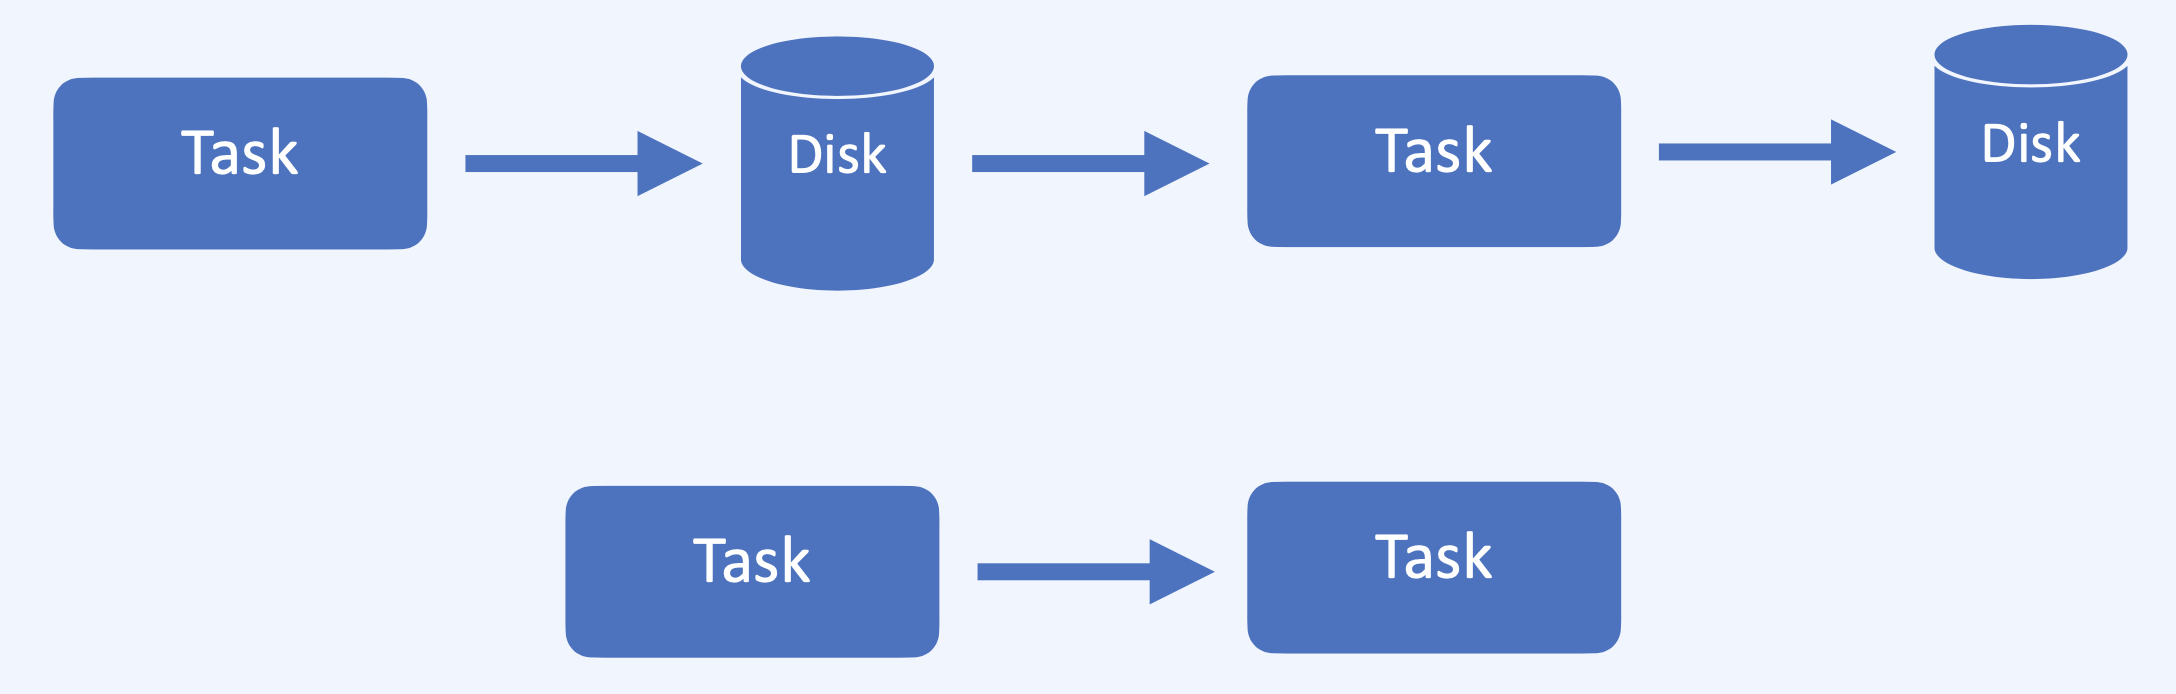

반복을 할 때 디스크를 다녀가는 것 만으로 비효율이 생긴다.

가급적 테스크에서 테스크로 넘어갈 때 인메모리 방식으로 진행하는 것이 유용하다.

이 방식을 위해서는 어떤 데이터를 메모리에 남겨야 할 지 알아야 가능하다.

트랜스포메이션은 지연 실행되기 때문에 메모리에 저장해 둘 수 있다.

데이터를 메모리에 남겨두고 싶을 때 사용할 수 있는 함수로 Cache()와 Persist()가 있다.

**Cache & Persist**  
Cache()와 Persist()로 데이터를 메모리에 저장해두고 사용이 가능하다.

.persist()를 추가하면 메모리에 저장해두고 쓸 수있다.(한 번 연산한 다음 그 결과값을 메모리에 저장해두고 다음 연산에서 쓸 수 있다.)

**스토리지 레벨**

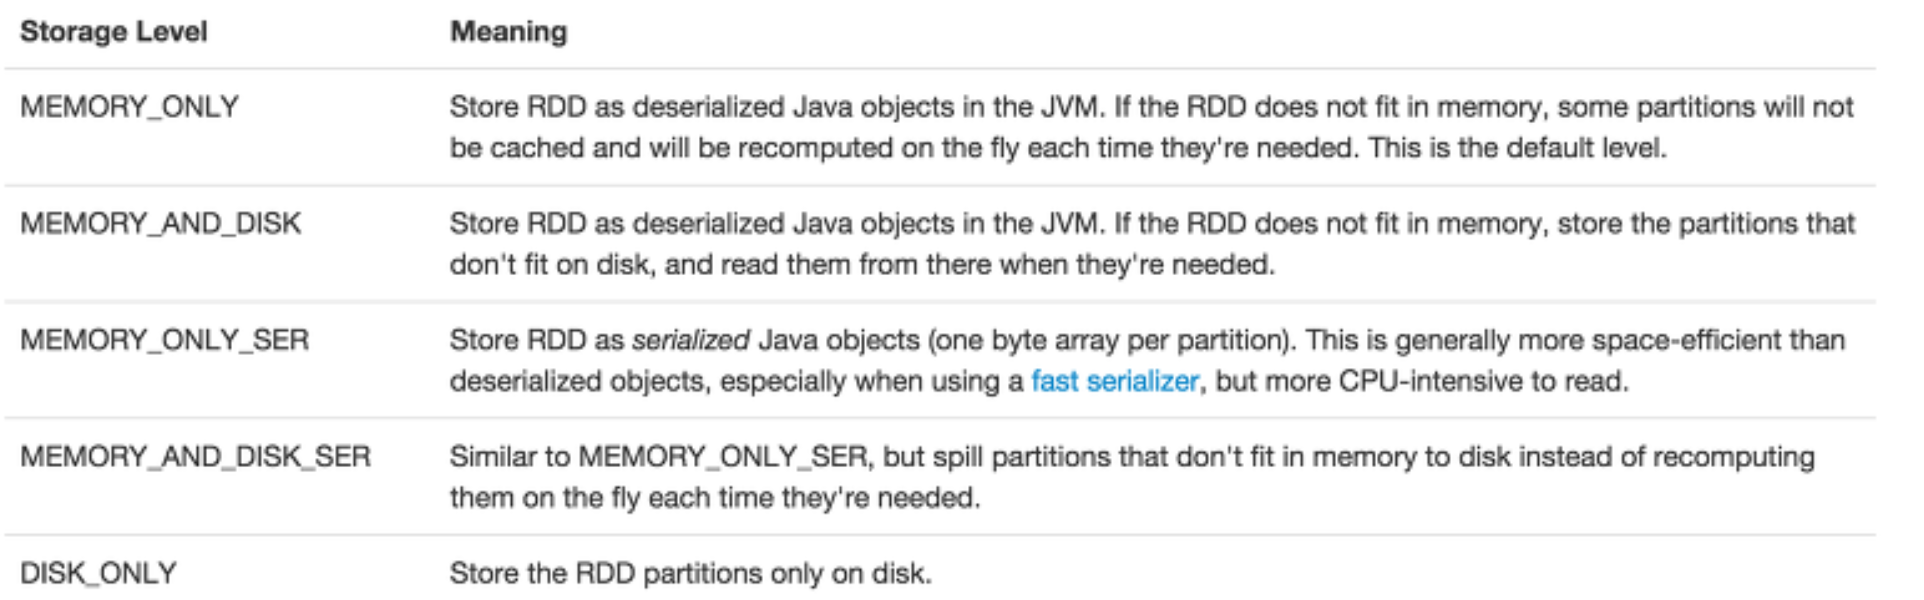

위 이미지는 메모리에 저장할 때 어디까지 저장할 것인지 정하는 스토리지 레벨이다.

SER은 serialized를 뜻하며 데이터를 좀 더 구조화 하여 저장하지만 연산이 추가된다.

**차이점**

Cache는 디폴트 스토리지 레벨을 사용한다.

RDD: MEMORY_ONLY

데이터 프레임: MEMORY_AND_DISK

Persist는 스토리지 레벨을 사용자가 원하는 대로 지정할 수 있다.
